# <font color='green'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='blue'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from tqdm import tqdm

<font color='blue'>Creating custom dataset</font>

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='blue'>Splitting data into train and test </font>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>


In [6]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros_like(row_vector)
    b = 0
    return w,b

In [7]:
initialize_weights(X_train[0])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 0)

$sigmoid(z)= 1/(1+exp(-z))$

In [8]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))
    return sig

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [9]:
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    #while dealing with numpy arrays you can use vectorized operations for quicker calculations as compared to using loops
    #https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html
    #https://www.geeksforgeeks.org/vectorized-operations-in-numpy/
    #write your code here
    loss = -1*np.mean(((y_true*np.log10(y_pred))+((1-y_true)*np.log10(1-y_pred))))
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = (1 - \frac{alpha*λ}{N}w^{(t)}$) + x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t})))

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [10]:
def gradient_dw(x,y,w,b,alpha,N,eta0):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = ((1-eta0*(alpha/N))*w)+((eta0*x)*(y-sigmoid(np.dot(x,w.T)+b)))
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [11]:
#sb should be a scalar value
def gradient_db(x,y,w,b,eta0):
    '''In this function, we will compute gradient w.r.to b '''
    db = b+(eta0*(y-sigmoid(np.dot(x,w.T)+b))) 
    
    return db

In [12]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b,x):
    val=sigmoid(np.dot(x,w.T)+b)
    return val


<font color='blue'> Implementing logistic regression</font>

In [13]:
def sgd_algo(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    
    w,b = initialize_weights(X_train[0])# initial weight vector
    N=len(X_train)
    train_loss=[]
    test_loss=[]
    epoch=[]
    for i in  tqdm(range(0,epochs)): 
        for j in range(0,N):
            #reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = gradient_dw(X_train[j],y_train[j],w,b,alpha,N,eta0) # updating weight vector
            b = gradient_db(X_train[j],y_train[j],w,b,eta0)       # updatind intercept  
        
        tr_pred= pred(w,b,X_train)
        train=logloss(y_train,tr_pred)
        train_loss.append(train)   
        te_pred= pred(w,b,X_test)
        test=logloss(y_test,te_pred)
        test_loss.append(test)
        epoch.append(i)
        
        #comparing previous loss and current loss, if loss is not updating then stoping the process 
        #if i!=0:
            #if train_loss[i]-train_loss[i-1] < 0.001:
                #break
    
    return w,b ,train_loss,test_loss ,epoch

In [14]:
eta0=0.0001
alpha=0.0001
epoch=10


w,b,train_loss,test_loss,epoch=sgd_algo(X_train,y_train,X_test,y_test,epoch, alpha,eta0)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]


In [15]:
#print thr value of weights w and bias b
print(w)
print(b)

[-0.42315311  0.19095979 -0.14588118  0.33814991 -0.21196623  0.56525978
 -0.44538357 -0.09171679  0.21795314  0.16977398  0.19522044  0.00229554
 -0.07781461  0.33882618  0.02214234]
-0.8500967712837226


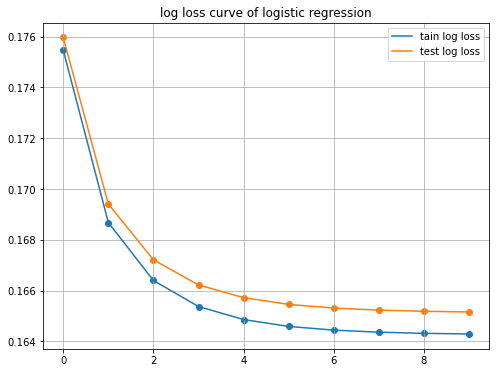

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoch,train_loss, label='tain log loss')
plt.plot(epoch,test_loss, label='test log loss')
plt.scatter(epoch,train_loss)
plt.scatter(epoch,test_loss)
plt.title('log loss curve of logistic regression')
plt.legend()

In [17]:
w

array([-0.42315311,  0.19095979, -0.14588118,  0.33814991, -0.21196623,
        0.56525978, -0.44538357, -0.09171679,  0.21795314,  0.16977398,
        0.19522044,  0.00229554, -0.07781461,  0.33882618,  0.02214234])

# <font color='red' size=5>SGD classifier</font>

In [18]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [19]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

C:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [20]:
clf.coef_

array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
         0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
         0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]])

### Difference between SGD classifier weight and custom implemented SGD weight

In [21]:
print(w-clf.coef_ )
print('\n')
print(b-clf.intercept_)

[[ 0.0002138   0.00548413  0.00270918 -0.00329416 -0.00377953  0.00509399
   0.00704126  0.00237134  0.00867994 -0.01106728 -0.00183147 -0.00192361
   0.00178909  0.00029817 -0.00052487]]


[0.00304153]


In [22]:
def pred_(w,b,x):
    val=sigmoid(np.dot(x,w.T)+b)
    k=[1 if i>=0.5 else 0 for i in val]
    return np.array(k)

### predicting through custom implemented weight and computing accuarcy

In [23]:
train_pred=pred_(w,b,X_train)
print('Train Accuracy = ',1-sum(y_train - train_pred)/len(X_train),'\n')

test_pred = pred_(w,b,X_test)
print('Test Accuracy = ', 1-sum(y_test - test_pred)/len(X_test))

Train Accuracy =  0.95536 

Test Accuracy =  0.95296


In [24]:
#this grader function should return True
#the difference between custom weights and clf.coef_ should be less than or equal to 0.05
def differece_check_grader(w,b,coef,intercept):
    val_array=np.abs(np.array(w-coef))
    assert(np.all(val_array<=0.05))
    print('The custom weights are correct')
    return True
differece_check_grader(w,b,clf.coef_,clf.intercept_)  

The custom weights are correct


True